In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np

#### You will be grade for documentation, see the [proper way to document a function here](https://github.com/numpy/numpy/blob/master/doc/HOWTO_DOCUMENT.rst.txt)

#### To avoid using ["magical numbers"]( https://refactoring.guru/replace-magic-number-with-symbolic-constant) in the code, we will define constants that we can use to refer to specific columns. Look through the columns of the dataset and fill out the constants. 

In [2]:
LICENSE_ID = 1 
ACCOUNT_NUMBER = 2
WARD = 10
LICENSE_DESCRIPTION = 15
BUSINESS_ACTIVITY = 17
APPLICATION_TYPE = 19
DATE_ISSUED = 27
LICENSE_STATUS = 28

<br>
### Question 1:
Write a piece of code that reads in the data to a list of lists. Discard any entries that are not issued in 2016.

In [3]:
import csv

def read_csv(filename):
    '''
    Read in csv file (filename) and create a list from it.
    
    Parameters
    ----------
    filename : str
        path to the file 
        
    Returns
    -------
    licenses: list
        a list of licenses
    '''
    licenses = []

    with open(filename, 'rb') as csvfile:
        bls = csv.reader(csvfile, delimiter=',')
        for idx, row in enumerate(bls):
            if idx == 0:
                continue
            if row[-7][-4:] != '2016':
                continue
            licenses.append(row)
    
    return licenses

#### Answer 1: Call your function here and print out the length of the list

In [4]:
print len(read_csv("Business_Licenses.csv"))

33383


#### Test 1: If your answer is correct, you will be able to run the cell without assertion error. *DO NOT MODIFY THE FOLLOWING CODE*

In [5]:
licenses = read_csv("Business_Licenses.csv")
assert(len(licenses)==33383)
assert(licenses[0] == ['1620668-20160516','2455262','295026','1','BUCCI BIG & TALL INC.','BUCCI BIG & TALL INC.',\
 '558 W ROOSEVELT RD', 'CHICAGO','IL','60607','25','28','25-28','1','1010','Limited Business License',\
 '911','Retail Sales of Clothing / Accessories / Shoes','1620668','RENEW', '', '03/15/2016', '05/18/2016',
 'N','05/16/2016','05/15/2018','05/18/2016','08/30/2016','AAI', '', '', '41.867338566', '-87.641590057',
 '(41.86733856638269, -87.64159005699716)']) 

<br>
### Question 2:
How many new licenses are issued in 2016? How many licenses are renewed in 2016? Look for value under APPLICATION TYPE column.

In [6]:
def get_type_licenses(licenses):
    '''
    Read in a list of license applications
    
    Parameters
    ----------
    licenses: list, a list of licenses
        
    Returns
    -------
    num_new_licenses: int
        number of new license applications
        
    num_renew_licenses: int
        number of license renewal applications
    '''
    num_new_licenses, num_renew_licenses = 0,0
    for idx, license in enumerate(licenses):
        ltype = license[19]
        if ltype == 'RENEW':
            num_renew_licenses+=1
        elif ltype == 'ISSUE':
            num_new_licenses+=1
    return num_new_licenses, num_renew_licenses

#### Answer 2: Call your function here and print out the answers

In [7]:
print get_type_licenses(licenses)

(8051, 24760)


#### Test 2: If your answer is correct, you will be able to run the cell without assertion error. *DO NOT MODIFY THE FOLLOWING CODE*

In [8]:
num_new_licenses, num_renew_licenses = get_type_licenses(licenses)
assert(num_new_licenses == 8052)
assert(num_renew_licenses == 24759)

AssertionError: 

<br>
### Question 3: 
Which ward has the largest numbers of licenses issued in 2016? You can either keep counts by updating variables for counts or updating a dictionary

In [21]:
def get_largest_num_licenses_issued(licenses):
    '''
    Read in a list of license applications
    
    Return a a tuple of (ward number, largest number of licenses )
    
    Parameters
    ----------
    licenses: list, a list of licenses
        
    Returns
    -------
    ward: String
        ward number with the largest number of newly issued licenses
        
    largest_num_license: int
        number of license newly issued licenses
    '''
    ward = ''
    largest_num_license = 0
    data = {}
    
    for idx, license in enumerate(licenses):
        if license[19] == 'ISSUE':
            ward = license[10]
            if ward not in data:
                data[ward] = 1
            else:
                data[ward] += 1
    for key, value in sorted(data.iteritems(), key=lambda (k,v): (v,k)):
        ward = key
        largest_num_license = value
    return (ward, largest_num_license)

#### Answer 3: Call your function here and print out the answers

In [22]:
print get_largest_num_licenses_issued(licenses)

('42', 1184)


#### Test 3: If your answer is correct, you will be able to run the cell without assertion error.*DO NOT MODIFY THE FOLLOWING CODE*

In [23]:
largest_num_license = get_largest_num_licenses_issued(licenses)
assert(largest_num_license == ('42', 1184))

<br>
### Question 4: 
What is the primary business activity in each ward in 2016? For this you will want to create dictionaries within a dictionary and sort the key value pairs. There are several ways to do this and you should have two layers of key-value maps that separates ward, and business activities. For example: ward ->  { business_name : count }.
Exclude any application that misses both ward number and business activities. 

In [77]:
def get_ward_business(licenses):
    '''
    Read in a list of license applications

    return a dict of the largest business types and ward as key and the count as value
    
    Parameters
    ----------
    licenses: list, a list of licenses
        
    Returns
    -------
    primary_business_by_ward: dict
        the largest business types and ward as key and the count as value
    '''
    data = {}
    for idx, license in enumerate(licenses):
        #if idx == 100:
        #    break
        ba = license[17]
        ward = license[10]
        if ward == '' or ba == '':
            continue
        if ward not in data:
            data[ward] = {ba: 1}
        else:
            if ba not in data[ward]:
                data[ward][ba] = 1
            else:
                data[ward][ba] += 1
    primary_business_by_ward = {}
    for k in data.keys():
        #         print k
        my_key = ()
        for key, value in sorted(data[k].iteritems(), key=lambda (k,v): (v,k), reverse=True):
            #print "%s: %s" % (key, value)
            #             print
            my_key = (key, value)
            break
        primary_business_by_ward[my_key] = k
    
    #     j = 0         
    #     for k in primary_business_by_ward.keys():     
    #         j += 1
    #         #print k
    #         print primary_business_by_ward[k]
    #         if j > 10:
    #             break

    
    return primary_business_by_ward.items()

#### Answer 4: Call your function here and print out the answers

In [78]:
print get_ward_business(licenses)

[(('Retail Sales of Perishable Foods', 153), '2'), (('Retail Sales of Perishable Foods', 46), '45'), (('Retail Sales of Perishable Foods', 192), '27'), (('Retail Sales of Perishable Foods', 21), '37'), (('Retail Sales of Perishable Foods', 42), '16'), (('Retail Sales of Perishable Foods', 30), '14'), (('Retail Sales of Perishable Foods', 17), '34'), (('Retail Sales of Perishable Foods', 123), '47'), (('Retail Sales of Perishable Foods', 69), '10'), (('Sales of Packaged Frozen Desserts From a Non-Motorized Cart (Mobile Desserts Vendor)', 32), '15'), (('Retail Sales of Perishable Foods', 57), '5'), (('Retail Sales of Perishable Foods', 78), '6'), (('Retail Sales of Perishable Foods', 88), '44'), (('Retail Sales of Perishable Foods', 34), '40'), (('Retail Sales of Perishable Foods', 22), '9'), (('Retail Sales of Perishable Foods', 84), '28'), (('Retail Sales of Perishable Foods', 124), '1'), (('Retail Sales of Perishable Foods', 49), '30'), (('Retail Sales of Perishable Foods', 70), '11')

In [79]:
get_ward_business(licenses)

[(('Retail Sales of Perishable Foods', 153), '2'),
 (('Retail Sales of Perishable Foods', 46), '45'),
 (('Retail Sales of Perishable Foods', 192), '27'),
 (('Retail Sales of Perishable Foods', 21), '37'),
 (('Retail Sales of Perishable Foods', 42), '16'),
 (('Retail Sales of Perishable Foods', 30), '14'),
 (('Retail Sales of Perishable Foods', 17), '34'),
 (('Retail Sales of Perishable Foods', 123), '47'),
 (('Retail Sales of Perishable Foods', 69), '10'),
 (('Sales of Packaged Frozen Desserts From a Non-Motorized Cart (Mobile Desserts Vendor)',
   32),
  '15'),
 (('Retail Sales of Perishable Foods', 57), '5'),
 (('Retail Sales of Perishable Foods', 78), '6'),
 (('Retail Sales of Perishable Foods', 88), '44'),
 (('Retail Sales of Perishable Foods', 34), '40'),
 (('Retail Sales of Perishable Foods', 22), '9'),
 (('Retail Sales of Perishable Foods', 84), '28'),
 (('Retail Sales of Perishable Foods', 124), '1'),
 (('Retail Sales of Perishable Foods', 49), '30'),
 (('Retail Sales of Perish

#### Test 4: If your answer is correct, you will be able to run the cell without assertion error. *DO NOT MODIFY THE FOLLOWING CODE*

In [80]:
assert(get_ward_business(licenses) == [(('Retail Sales of Perishable Foods', 44), '36'),
 (('Retail Sales of Perishable Foods', 35), '50'),
 (('Retail Sales of Perishable Foods', 144), '41'),
 (('Retail Sales of Perishable Foods', 34), '40'),
 (('Retail Sales of Perishable Foods', 54), '24'),
 (('Retail Sales of Perishable Foods', 36), '19'),
 (('Retail Sales of Perishable Foods', 67), '32'),
 (('Retail Sales of Perishable Foods', 30), '14'),
 (('Retail Sales of Perishable Foods', 124), '1'),
 (('Retail Sales of Perishable Foods', 63), '35'),
 (('Retail Sales of Perishable Foods', 69), '23'),
 (('Retail Sales of Perishable Foods', 78), '6'),
 (('Retail Sales of Perishable Foods', 80), '22'),
 (('Retail Sales of Perishable Foods', 22), '9'),
 (('Retail Sales of Perishable Foods', 84), '28'),
 (('Retail Sales of Perishable Foods', 21), '37'),
 (('Retail Sales of Perishable Foods', 17), '34'),
 (('Retail Sales of Perishable Foods', 57), '46'),
 (('Retail Sales of Perishable Foods', 49), '30'),
 (('Consumption of Liquor on Premises', 40), '43'),
 (('Retail Sales of Perishable Foods', 35), '31'),
 (('Retail Sales of Perishable Foods', 49), '26'),
 (('Retail Sales of Perishable Foods', 44), '7'),
 (('Retail Sales of Perishable Foods', 71), '8'),
 (('Retail Sales of Perishable Foods', 57), '29'),
 (('Retail Sales of Perishable Foods', 75), '3'),
 (('Retail Sales of Perishable Foods', 623), '42'),
 (('Retail Sales of Perishable Foods', 29), '20'),
 (('Retail Sales of Perishable Foods', 51), '39'),
 (('Retail Sales of Perishable Foods', 192), '27'),
 (('Retail Sales of Perishable Foods', 32), '13'),
 (('Sales of Packaged Frozen Desserts From a Non-Motorized Cart (Mobile Desserts Vendor)',
   32),
  '15'),
 (('Retail Sales of Perishable Foods', 60), '21'),
 (('Retail Sales of Perishable Foods', 69), '10'),
 (('Retail Sales of Perishable Foods', 67), '12'),
 (('Retail Sales of Perishable Foods', 123), '47'),
 (('Retail Sales of Perishable Foods', 42), '16'),
 (('Retail Sales of Perishable Foods', 70), '11'),
 (('Retail Sales of Perishable Foods', 82), '49'),
 (('Retail Sales of Perishable Foods', 44), '17'),
 (('Retail Sales of Perishable Foods', 88), '44'),
 (('Retail Sales of Perishable Foods', 57), '5'),
 (('Retail Sales of Perishable Foods', 46), '45'),
 (('Retail Sales of Perishable Foods', 155), '25'),
 (('Retail Sales of Perishable Foods', 23), '48'),
 (('Retail Sales of Perishable Foods', 20), '38'),
 (('Retail Sales of Perishable Foods', 71), '33'),
 (('Retail Sales of Perishable Foods', 128), '4'),
 (('Retail Sales of Perishable Foods', 28), '18'),
 (('Retail Sales of Perishable Foods', 154), '2')])

AssertionError: 

<br>
### Question 5: 
What’s the breakdown of license types in terms of percentage of each type of license according to license description? 

In [95]:
def get_license_breakdown(licenses):
    '''
    Read in a list of license applications

    return a dict of the the type of license as key and count as percentage as a string as value
    
    Parameters
    ----------
    licenses: list, a list of licenses
        
    Returns
    -------
    license_breakdown: dict
        the type of license as key and count as percentage as a string as value
    '''
    license_breakdown = {}
    license_count = {}
    total = 0.0
    for idx, license in enumerate(licenses):
        ld = license[15]

        if ld in license_count:
            license_count[ld] +=1
        else:
            license_count[ld] = 0
        total +=1        
        
    for k in license_count:
        license_breakdown[k] = str(round(license_count[k] / total * 100, 2)) 
    return license_breakdown

#### Answer 5: Call your function here and print out the answers

In [98]:
print get_license_breakdown(licenses)

{'Outdoor Patio': '0.86', 'Package Goods': '2.01', 'Animal Care License': '0.49', 'Raffles': '1.26', 'Consumption on Premises - Incidental Activity': '3.99', 'Explosives, Certificate of Fitness': '0.06', 'Peddler License': '2.67', 'Public Garage': '0.55', 'Performing Arts Venue': '0.12', 'Motor Vehicle Services License': '2.27', 'Shared Kitchen User': '0.36', 'Limited Business License': '37.24', 'Heliports': '0.01', 'Taxicab Two-Way Dispatch Service License': '0.05', 'Wholesale Food Establishment': '0.93', 'Itinerant Merchant': '0.58', 'Emerging Business': '0.03', "Caterer's Liquor License": '0.38', 'Mobile Food License': '0.5', "Children's Services Facility License": '1.38', 'Bicycle Messenger Service': '0.02', 'Not-For-Profit Club': '0.1', 'Manufacturing Establishments': '1.49', 'License Manager': '0.07', 'Weapons Dealer': '0.0', 'Tavern': '1.32', 'Navy Pier Kiosk License': '0.02', 'Accessory Garage': '0.13', 'Pawnbroker': '0.07', 'Explosives': '0.05', 'Industrial Private Event Venue

#### Test 5: If your answer is correct, you will be able to run the cell without assertion error. *DO NOT MODIFY THE FOLLOWING CODE*

In [99]:
assert(get_license_breakdown(licenses)== [('Limited Business License', '37.24'),
 ('Consumption on Premises - Incidental Activity', '3.99'),
 ('Tobacco', '3.52'),
 ('Peddler License', '2.67'),
 ('Motor Vehicle Services License', '2.27'),
 ('Package Goods', '2.02'),
 ('Retail Food Establishment', '17.53'),
 ('Regulated Business License', '12.62'),
 ('Special Event Food', '1.95'),
 ('Manufacturing Establishments', '1.50'),
 ('Valet Parking Operator', '1.40'),
 ("Children's Services Facility License", '1.39'),
 ('Tavern', '1.33'),
 ('Raffles', '1.26'),
 ('Public Place of Amusement', '1.00'),
 ('Wholesale Food Establishment', '0.93'),
 ('Outdoor Patio', '0.86'),
 ('Filling Station', '0.64'),
 ('Special Event Liquor', '0.64'),
 ('Itinerant Merchant', '0.59'),
 ('Public Garage', '0.55'),
 ('Mobile Food License', '0.51'),
 ('Animal Care License', '0.49'),
 ('Massage Establishment', '0.48'),
 ("Caterer's Liquor License", '0.39'),
 ('Food - Shared Kitchen Long-Term User', '0.37'),
 ('Late Hour', '0.26'),
 ('Secondhand Dealer', '0.19'),
 ('Secondhand Dealer (No Valuable Objects)', '0.19'),
 ('Accessory Garage', '0.13'),
 ('Performing Arts Venue', '0.12'),
 ('Not-For-Profit Club', '0.10'),
 ('Pawnbroker', '0.08'),
 ('Music and Dance', '0.08'),
 ('Tobacco Dealer Wholesale', '0.07'),
 ('License Manager', '0.07'),
 ('Food - Shared Kitchen Short-Term User', '0.06'),
 ('Explosives, Certificate of Fitness', '0.06'),
 ('Taxicab Two-Way Dispatch Service License', '0.06'),
 ('Food - Shared Kitchen - Supplemental', '0.06'),
 ('Affiliation', '0.06'),
 ('Explosives', '0.05'),
 ('Indoor Special Event', '0.05'),
 ('Emerging Business', '0.03'),
 ('Navy Pier Kiosk License', '0.03'),
 ('Bicycle Messenger Service', '0.03'),
 ("Caterer's Registration (Liquor)", '0.03'),
 ('Wrigley Field', '0.02'),
 ('Transportation Network Provider', '0.01'),
 ('Industrial Private Event Venue', '0.01'),
 ('Heliports', '0.01'),
 ('License Broker', '0.01'),
 ('Navy Pier - Mobile', '0.01'),
 ('Tobacco Sampler', '0.01'),
 ('Food - Shared Kitchen', '0.00'),
 ('Retail Food - Seasonal Lakefront Food Establishment', '0.00'),
 ('Weapons Dealer', '0.00'),
 ('Liquor Airport Pushcart License', '0.00')])

AssertionError: 

<br>
### Question 6: 
Of all the licenses that were issued in 2016, what percentage of them have been revoked? 

In [134]:
def get_percentage_revoked(licenses):
    '''
    Read in a list of license applications

    return a percentage as a string that represents the % of licenses that were revoked
    
    Parameters
    ----------
    licenses: list, a list of licenses
        
    Returns
    -------
    revoked_percent: string
        a percentage as a string that represents the % of licenses that were revoked
    '''
    #     LICENSE_ID = 1 
    #     ACCOUNT_NUMBER = 2
    #     WARD = 10
    #     LICENSE_DESCRIPTION = 15
    #     BUSINESS_ACTIVITY = 17
    #     APPLICATION_TYPE = 19
    #     DATE_ISSUED = 27
    #     LICENSE_STATUS = 28
    revoked_percent = 0.0
    mapping = {}
    for idx, license in enumerate(licenses):
        ls = license[LICENSE_STATUS]
        if ls in mapping:
            mapping[ls] +=1
        else:
            mapping[ls] = 1
    revoked_percent = mapping['REV'] * 100.0 / len(licenses) 
    return str(round(revoked_percent, 2))

#### Answer 6: Call your function here and print out the answers

In [135]:
print get_percentage_revoked(licenses)

0.22


#### Test 6: If your answer is correct, you will be able to run the cell without assertion error. *DO NOT MODIFY THE FOLLOWING CODE*

In [136]:
assert(get_percentage_revoked(licenses) == '0.21') 

AssertionError: 

<br>
### Question 7: 

Make a bar chart of numbers of licenses applied in 2016 by ward by calling the make_bar() function with the correct parameters

In [145]:
def make_bar(wards, num_licenses):
    '''
    Make a bar chart of numbers of licenses applied in 2016 by ward
    
    Parameters
    ----------
    wards : list of string
        a list of ward names
        
    num_licenses: list of int
        a list of number of license applications in the wards accordingly
    
    Returns
    -------
    ward_licenses: png graph
    
    '''
    fig = plt.figure(figsize=(17, 5))
    y_pos = np.arange(len(wards))
    plt.bar(y_pos, num_licenses, alpha=0.5, linewidth=0.2)
    plt.xticks(y_pos, wards)
    plt.xlabel("Ward")
    plt.ylabel("Number of license applications")
    plt.savefig('ward_licenses.png')
    plt.show()

#### Answer 7: Call your function here and show the plot

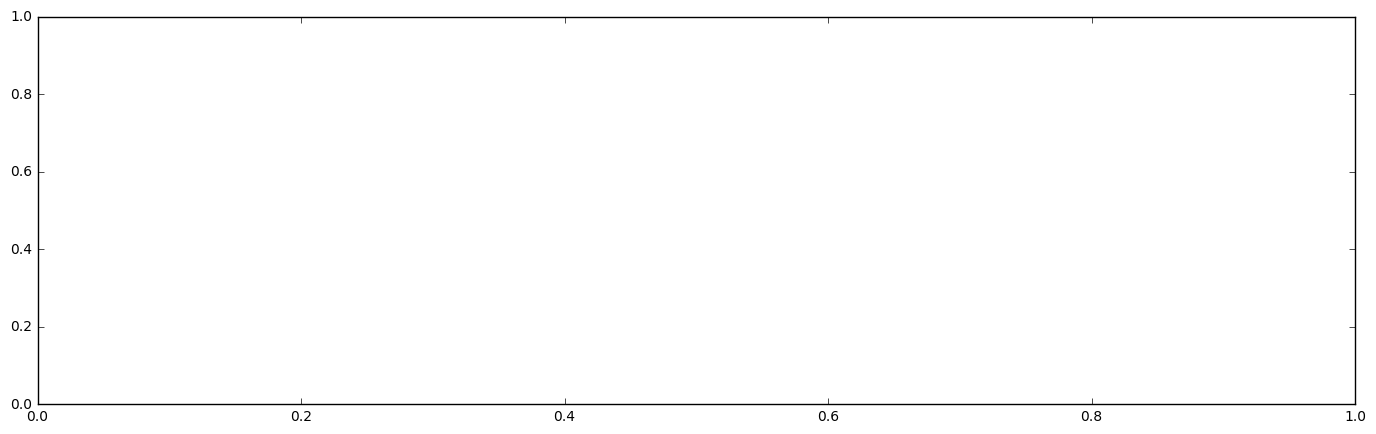

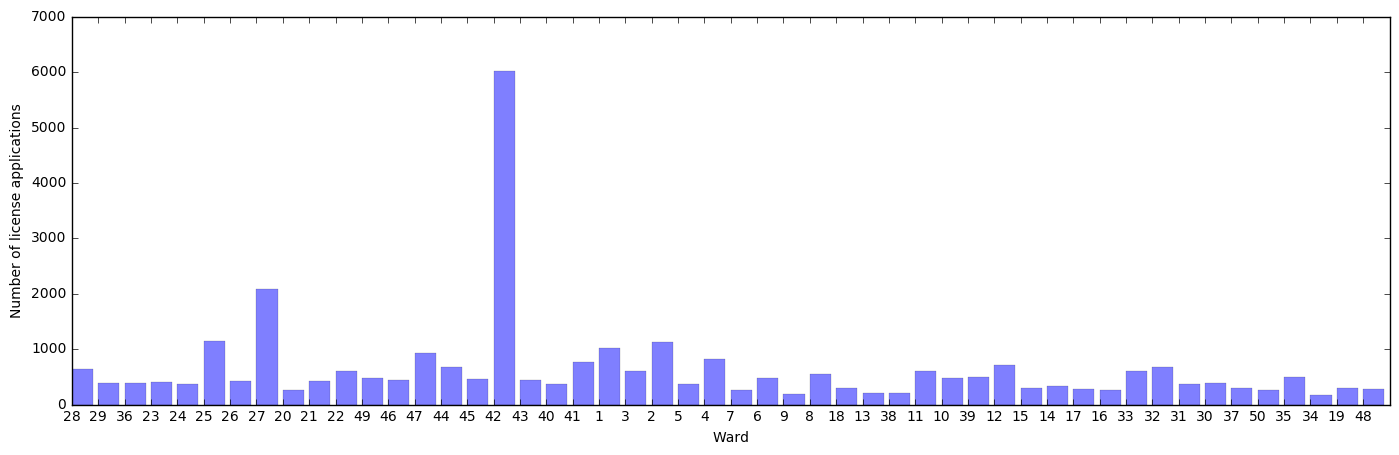

In [146]:
wards = []
num_licenses = []
wnl_mapping = {}
for license in licenses:
    ward = license[WARD]
    if ward == '':
        continue
    if ward in wnl_mapping:
        wnl_mapping[ward] += 1
    else:
        wnl_mapping[ward] = 1
wards = wnl_mapping.keys()
num_licenses = wnl_mapping.values()
make_bar(wards, num_licenses)

#### Test 7: If your answer is correct, you will be able to run the cell without an error and see the following graph. *DO NOT MODIFY THE FOLLOWING CODE*

 ![title](ward_licenses.png)